# The Next Potential Defi Token To The Moon

#### Author: Jun Zhuang

# README
(1726 words, 6m54s reading time)

### What is Defi?
[Decentralized Finance](https://en.wikipedia.org/wiki/Decentralized_finance), namely Defi, is new emerging terminology for a variety of financial applications or services based on the blockchain platform. The goal of Defi is to establish a financial system that opens to every user. To fulfill this goal, Defi leads to the bull market in recent months. Most existing Defi services can be divided into five categories: Lending, DEXes, Derivatives, Payments, and Yield farming.  
* **Lending** is similar to the bank. Users can borrow money from this project or deposit the money here to earn interest. However, unlike the bank, this kind of lending project does not need to monitor the users by a human. All rules are executed by the smart contract.
* **DEXes** is short for Decentralized Exchanges. It's a kind of crypto exchange that allows everyone to buy or sell all kinds of tokens.
* **Derivatives** is a promising direction of Defi as it provides many derivative tools to professional investors to hedge the risk.
* **Payments** here may refer to the Bridge across different blockchains. For example, users from Ethereum could transfer their assets to Binance Smart Chain (BSC) or Huobi Ecosystem (Heco), or vice versa.
* **Yield** is short for yield farming, which refers to a kind of project that provides high yield products to investors. For example, the project admin could design a smart contract to help investors auto-compound the stacked tokens in DEXes and then earn the performance fee.


### How do we find out the next potential Defi token to the moon?
Many popular Defi projects offer tokens. Investors can buy the token for investment purposes. Indeed, some famous Defi tokens have a great increase in this bull market. Many investors may want to find out the next potential Defi token that will launch to the moon to maximize their profit. However, it is a challenging problem that nobody can guarantee this kind of token.  

One conventional approach is to forecast the price based on time-series data. In this article, BTC is selected as an example because it is the most representative crypto-currency. I use the [Bitcoin data](https://www.kaggle.com/mczielinski/bitcoin-historical-data?select=bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv) at 1-min intervals from Jan. 2012 to Mar. 2021. In the experiment, I first select the weighted price from Jan. 2020 to Mar. 2021 and then split the train/test data at Jan. 2021. In other words, the time-series data after Jan. 2021 is selected as the test set whereas the rest data is used for training. After data normalization, I employ the LSTM model to forecast the BTC price. The detailed experimental setting can be found on the [script](https://github.com/junzhuang-code/potential_defi_tokens/blob/main/defi_analysis.ipynb). The predicted price shows apparently lower than the actual price. One potential reason is that the data distribution is changed on the test data (the BTC price increases rapidly in the bull market) and thus the model fails to forecast the price. That is to say, the forecasting may get worse when the price changes abruptly. Besides this shortcoming, the performance of time series forecasting highly depends on the size of the dataset.  

A simple solution is possible if the goal is changed to find out the potential tokens instead of the price prediction. In this article, I propose a novel scheme to find out such tokens by using timestamp data. One benefit of using timestamp data is that the model only requires a screenshot of time-series data as input. In the upcoming section, I will introduce my proposed scheme in detail.  


**Data Collection**  
At first, I collect a demo dataset from several famous cryptocurrency websites, such as [Defipulse](https://defipulse.com/), [Coinmarketcap](https://coinmarketcap.com/), and [Defibox](https://www.defibox.com/index). After that, I select features and label the data based on the return. More specifically, I split the return into three earning levels (1,2,3). I label the data as the high earning level when the token got the return no less than 1,000% in 2021 (to Apr. 26), whereas I label the data as the low earning level when the token got the return less than 400% in the same period. The rest data is labeled as the medium earning level. The ratio of these three levels is 8:7:5 (from low to high). The intuition is that we want to find out which token has a higher return. To do so, I convert this problem into a classification task.

Besides, I make a brief introduction to the selected features as follows.
* Name (Str): The name of the Defi project.
* Symbol (str): The symbol of the token.
* Chain (str): The blockchain that the project first deploys.
* Category (str): The Category that the project belongs to.
* TVL (float): Total value locked refers to the total money (USD in billion) that investors deposit in the project.
* Mkt_Cap (float): The market capital of the token (USD in billion).
* MC/TVL (float): The ratio of Mkt_Cap to TVL.
* Cir_Supply (int): The number of tokens that are circulating in the market and are in public hands.
* Total_Supply (int): The number of tokens that have been already created, minus any coins that have been burned.
* Max_Supply (int): The maximum number of tokens that will ever exist in the lifetime of the cryptocurrency.
* Cir_Ratio (float): The ratio of the circulating supply to the total supply.
* Price0 (float): The price (USD) on the first day or in 2021-01-01 (Applied to the earlier one).
* Price1 (float): The price (USD) on the collection day (2021-04-26).
* Return (float): The ratio of Price1 to Price0, which indicates the return.

**Preprocessing**  
After building the dataset, I implement one-hot embedding on *'Chain'* and *'Category'* as these two features are categorical strings. After that, I drop some unnecessary features such as *'Name'* and *'Symbol'* since these two features are unique to each token and have no help to our task. Lastly, all values are normalized within [0, 1] for better training.

**Methods**  
Until now, we can employ machine learning models to classify the data. In this demo, I select two classic models, random forest classifier (RFC) and support vector machine classifier (SVMC). Before training the models, I split the dataset as train data (75%) and test data (25%). Also, I evaluate the performance by accuracy on the test data. Duo to demo purpose, I didn't tune the models. The results show that both models achieve **80%** accuracy, which means that this design can successfully find out the tokens from each earning level.

| Model | Accuracy |
| :-----: | :----: |
| RFC | 0.80 |
| SVMC | 0.80 |


### Observations
After achieving the goal, I want to share some observations on this demo dataset.

1. About the next potential tokens:  
All Defi projects on BSC have higher returns. This result may have a bias as the period of the data collection is within this year. These BSC projects start late so that most of the increase is within this year.  
TVL indicates the quality of the projects. The higher quality of the project, the more people are willing to deposit the money in this project. Mkt_Cap represents the market capitalization of the token. The figure below displays the ratio of Mkt_Cap to TVL. The token could be underestimated if this ratio is smaller. Based on this observation, I notice that CRV and MDX are two tokens that are highly underestimated by the market. They could be the next potential tokens to the moon (not financial advice). Note that underestimation doesn't mean that the price will rapidly increase in a short period. Other reasons may affect the price as well. For example, both the above-mentioned tokens have low Cir_Ratio, which means that they have large pre-minted tokens. A larger supply may suppress the price longer.  

2. About the top projects:  

| Name | TVL | Mkt_Cap |
| :-----: | :----: | :----: |
| Uniswap | 8.83 | 19.88 |
| PancakeSwap | 8.35 | 5.26 |
| Aave | 7.41 | 4.96 |
| Maker | 9.75 | 4.16 |
| Compound | 8.89 | 3.32 |

The table above presents the top five projects w.r.t. TVL and Mkt_Cap. The market has a high agreement on the top five projects. Within these projects, Compound has the lowest Return. One potential reason is that it has the lowest MC/TVL.  

3. About the categories:  

| Category | TVL | Mkt_Cap | Earning_Level |
| :-----: | :----: | :----: | :----: |
| Lending | 7.71 | 3.28 | 2.25 |
| Payments | 1.52 | 1.90 | 2.00 |
| Yield | 1.99 | 0.23 | 2.00 |
| Dexes | 5.09 | 4.10 | 1.85 |
| Derivatives | 0.77 | 0.84 | 1.00 |

The table above describes the average values of TVL, Mkt_Cap, and Earning_Level for each category. I notice that Lending projects have the highest earning level (2.25) and TVL (7.71) on average, whereas Dexes projects have the highest market capital (4.10) on average. Those two categories are very popular in this bull market.  

4. About the correlation:  
The heatmap presents the correlation among features. I'm interested in some features that are helpful to the investment as follows. Cir_Ratio and Price have a higher positive correlation as shorter supply may be easier to cause the increase of the price. A similar positive correlation is also applied to TVL and Mkt_Cap as higher quality projects can attract more investors. It's expected that Cir_Ratio has a higher positive correlation to the Return but actually, it is only 0.103821.  


### Conclusion
In this demo, I design a scheme to find out the next potential Defi token to the moon by machine learning approach. I collect some demo data from several famous cryptocurrency websites and build machine learning models to classify which token has higher potential. Besides, I also share some observations based on the demo data. In brief, MC/TVL is a helpful feature to find out which token is underestimated. Lending and Dexes projects have higher TVL and Mkt_Cap.  
In the future, this scheme could be extended to an online data analysis framework. More specially, we could monitor the data from the cryptocurrency websites' API and then analyze the data on-the-fly. To achieve the same goal, we could also convert the problem into a prediction task by using the Return as the label (we don't know the price in the future). Those attempts may be left for future work.


# Conventional forecasting on time-series data

In [3]:
# Import dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime, pytz
# ref1: https://www.kaggle.com/someadityamandal/bitcoin-time-series-forecasting
# ref2: https://www.kaggle.com/mczielinski/bitcoin-historical-data?select=bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv

def dateparse (time_in_secs):
    # Define a conversion function for the native timestamps in the csv file
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

data_btc = pd.read_csv('./data/bitstamp_data.csv', parse_dates=[0], date_parser=dateparse)
data_btc.info()


In [48]:
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

# Select features for time-series prediction
data = data_btc.copy()
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)
data = data.groupby([pd.Grouper(key='Timestamp', freq='H')]).first().reset_index()
data = data.set_index('Timestamp')
data = data[['Weighted_Price']]
data['Weighted_Price'].fillna(method='ffill', inplace=True)
#data.head()

# Select the range of data and split them into train/test data
start_date = '2020-1-1'
end_date = '2021-3-31'
split_date = '2020-12-31'
data_train = data.loc[(data.index >= start_date) & (data.index <= split_date)].copy()
data_test = data.loc[(data.index >= split_date) & (data.index <= end_date)].copy()

# Data reshape
data_train_ar = data_train.values
data_test_ar = data_test.values
data_train_ar = np.reshape(data_train_ar, (len(data_train_ar), 1))
data_test_ar = np.reshape(data_test_ar, (len(data_test_ar), 1))

# Data normalization
data_train_ar = sc.fit_transform(data_train_ar)
data_test_ar = sc.transform(data_test_ar)
X_train = data_train_ar[0:len(data_train_ar)-1]
Y_train = data_train_ar[1:len(data_train_ar)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))
X_test = np.reshape(data_test_ar, (len(data_test_ar), 1, 1))


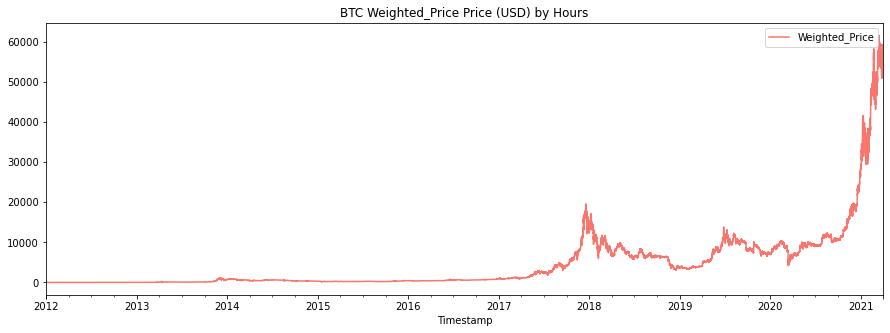

In [35]:
# Present the historical price of BTC (2012-2021)
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data.plot(style='', figsize=(15,5), color=color_pal[0], title='BTC Weighted_Price Price (USD) by Hours')


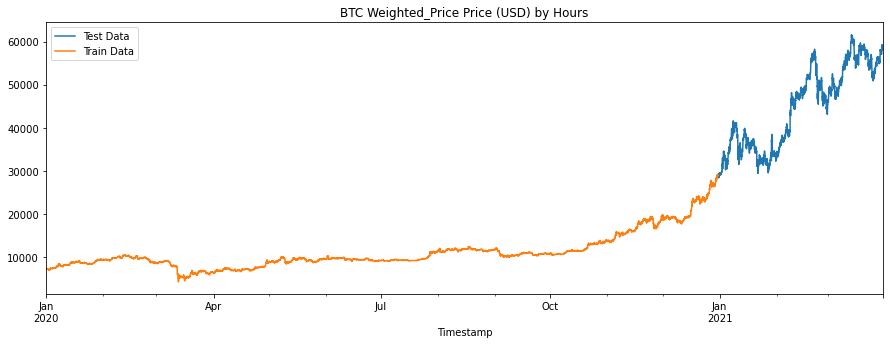

In [37]:
# Present the train/test data
_ = data_test \
    .rename(columns={'Weighted_Price': 'Test Data'}) \
    .join(data_train.rename(columns={'Weighted_Price': 'Train Data'}), how='outer') \
    .plot(figsize=(15,5), title='BTC Weighted_Price Price (USD) by Hours', style='')


In [40]:
# Train LSTM model for price prediction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation

model = Sequential()
model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=50, verbose=2)


Train on 8760 samples
Epoch 1/100
8760/8760 - 3s - loss: 0.0557
Epoch 2/100
8760/8760 - 1s - loss: 0.0349
Epoch 3/100
8760/8760 - 1s - loss: 0.0240
Epoch 4/100
8760/8760 - 1s - loss: 0.0184
Epoch 5/100
8760/8760 - 1s - loss: 0.0143
Epoch 6/100
8760/8760 - 1s - loss: 0.0116
Epoch 7/100
8760/8760 - 1s - loss: 0.0094
Epoch 8/100
8760/8760 - 1s - loss: 0.0082
Epoch 9/100
8760/8760 - 1s - loss: 0.0071
Epoch 10/100
8760/8760 - 1s - loss: 0.0063
Epoch 11/100
8760/8760 - 1s - loss: 0.0058
Epoch 12/100
8760/8760 - 1s - loss: 0.0052
Epoch 13/100
8760/8760 - 1s - loss: 0.0047
Epoch 14/100
8760/8760 - 1s - loss: 0.0044
Epoch 15/100
8760/8760 - 1s - loss: 0.0039
Epoch 16/100
8760/8760 - 1s - loss: 0.0038
Epoch 17/100
8760/8760 - 1s - loss: 0.0035
Epoch 18/100
8760/8760 - 1s - loss: 0.0033
Epoch 19/100
8760/8760 - 1s - loss: 0.0032
Epoch 20/100
8760/8760 - 1s - loss: 0.0030
Epoch 21/100
8760/8760 - 1s - loss: 0.0029
Epoch 22/100
8760/8760 - 1s - loss: 0.0027
Epoch 23/100
8760/8760 - 1s - loss: 0.002

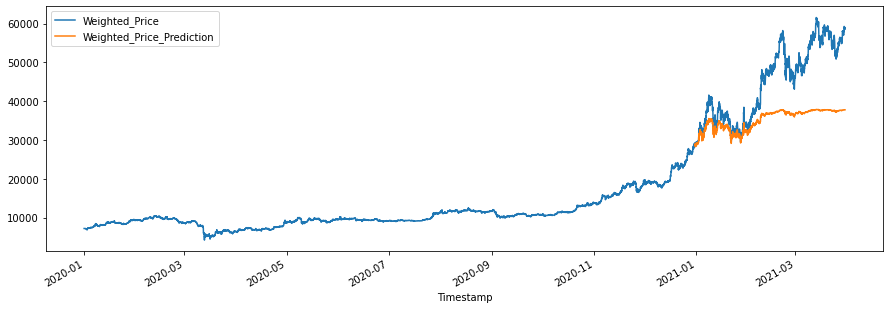

In [49]:
# Make the predictions
predicted_BTC_price = model.predict(X_test)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)
data_test['Weighted_Price_Prediction'] = predicted_BTC_price
data_all = pd.concat([data_test, data_train], sort=False)
# Display the predicted results
_ = data_all[['Weighted_Price','Weighted_Price_Prediction']].plot(figsize=(15, 5))


In [47]:
# Evaluation by MSE
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true=data_test['Weighted_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])
# Conclusion: The prediction may get worse if the distribution in test data is distinctly changed.
# Besides, prediction based on time-series data requires lots of data and thus consumes large saving space.


141402947.64619008

# Classification on time-stamp data

In [1]:
import pandas as pd
import numpy as np

# Import dataset
data_df = pd.read_csv('./data/defi_data.csv')
#print("train.csv: \n")
print(data_df.info()) # 查看特征统计
print(data_df.describe()) # 查看数据的描述性统计
data_df.corr() # 展示变量之间的相关性
#data_df1.head() # 查看数据前5行


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           20 non-null     object 
 1   Symbol         20 non-null     object 
 2   Chain          20 non-null     object 
 3   Category       20 non-null     object 
 4   TVL            20 non-null     float64
 5   Mkt_Cap        20 non-null     float64
 6   MC/TVL         20 non-null     float64
 7   Cir_Supply     20 non-null     int64  
 8   Total_Supply   20 non-null     int64  
 9   Max_Supply     20 non-null     int64  
 10  Cir_Ratio      20 non-null     float64
 11  Price0         20 non-null     float64
 12  Price1         20 non-null     float64
 13  Return         20 non-null     float64
 14  Earning_Level  20 non-null     int64  
dtypes: float64(7), int64(4), object(4)
memory usage: 2.5+ KB
None
             TVL    Mkt_Cap     MC/TVL    Cir_Supply  Total_Supply  \
count  20.00

,TVL,Mkt_Cap,MC/TVL,Cir_Supply,Total_Supply,Max_Supply,Cir_Ratio,Price0,Price1,Return,Earning_Level
TVL,1.000000,0.572507,-0.306691,-0.121044,-0.117959,-0.082679,0.217953,0.464146,0.477151,0.177666,0.344522
Mkt_Cap,0.572507,1.000000,0.323745,0.090061,0.065239,0.046382,0.183859,0.096648,0.094555,-0.009705,0.159309
MC/TVL,-0.306691,0.323745,1.000000,0.158470,0.152444,0.111751,-0.093084,-0.143120,-0.159192,-0.114601,0.003113
Cir_Supply,-0.121044,0.090061,0.158470,1.000000,0.984444,0.952275,0.021049,-0.134100,-0.120970,0.361659,0.293481
Total_Supply,-0.117959,0.065239,0.152444,0.984444,1.000000,0.983799,-0.098895,-0.150818,-0.136372,0.349433,0.331348
Max_Supply,-0.082679,0.046382,0.111751,0.952275,0.983799,1.000000,-0.146316,-0.163068,-0.147514,0.320497,0.327770
Cir_Ratio,0.217953,0.183859,-0.093084,0.021049,-0.098895,-0.146316,1.000000,0.403116,0.385758,0.103821,-0.101670
Price0,0.464146,0.096648,-0.143120,-0.134100,-0.150818,-0.163068,0.403116,1.000000,0.986596,-0.140920,0.002166
Price1,0.477151,0.094555,-0.159192,-0.120970,-0.136372,-0.147514,0.385758,0.986596,1.000000,-0.031175,0.074062
Return,0.177666,-0.009705,-0.114601,0.361659,0.349433,0.320497,0.103821,-0.140920,-0.031175,1.000000,0.701052


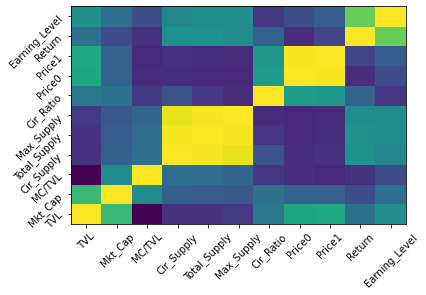

In [21]:
# Plotting the heatmap for the correlation matrix
import matplotlib.pyplot as plt
cor_df = data_df.corr()
plt.pcolor(cor_df)
plt.yticks(np.arange(0.5, len(cor_df.index), 1), cor_df.index, rotation=45)
plt.xticks(np.arange(0.5, len(cor_df.columns), 1), cor_df.columns, rotation=45)
plt.show()
# Lighter color indicates higher positive correlation


## Preprocessing

In [2]:
# Extract the label and id
label = data_df["Earning_Level"]
print("Classes distribution: \n", label.value_counts())
print("Exist null labels? Ans:", label.isnull().any())


Classes distribution: 
 1    8
2    7
3    5
Name: Earning_Level, dtype: int64
Exist null labels? Ans: False


In [3]:
# Utils functions for preprocessing

def ohe_cols(df, list_ohe):
    # Implement one-hot embedding on selected columns
    df = df.copy()
    for column in list_ohe:
        tmp_col = pd.get_dummies(df[column], prefix=column) # generate one-hot embedding
        df = pd.concat([df, tmp_col], axis=1) # concate the new ohe to original df
        df.drop([column], axis=1, inplace=True)
    return df

def drop_cols(df, list_drop):
    # Drop selected colums (list_drop) and return the new daraframe (df)
    df = df.copy()
    for column in df.columns:
        if column in list_drop:
            df.drop([column], axis=1, inplace=True)
    return df

def normalize(df):
    # Normalize the dataframe to [0,1].
    for column in df.columns:
        max_value = df[column].max()
        min_value = df[column].min()
        df[column] = (df[column] - min_value) / (max_value - min_value)
    return df


In [4]:
## Preprocessing for "defi_data.csv"

# 1. One-hot embedding
list_ohe = ["Chain", "Category"]
df_ohe = ohe_cols(data_df, list_ohe)
# 2. Drop selected columns
list_drop = ["Name", "Symbol", "Earning_Level"]
df_drop = drop_cols(df_ohe, list_drop)
# 3. Normalize the df to [0, 1]
df_nm = normalize(df_drop)
#print(df_nm.info())
df_nm


,TVL,Mkt_Cap,MC/TVL,Cir_Supply,Total_Supply,Max_Supply,Cir_Ratio,Price0,Price1,Return,Chain_BSC,Chain_Ethereum,Chain_Heco,Category_Derivatives,Category_Dexes,Category_Lending,Category_Payments,Category_Yield
0,1.000000,0.206061,0.141753,0.000093,0.000043,0.000032,1.000000,1.000000,1.000000,0.067110,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.911523,0.163636,0.122261,0.000880,0.000944,0.000931,0.446368,0.242496,0.155230,0.039612,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.759259,0.246465,0.230673,0.002309,0.001544,0.001531,0.753204,0.145742,0.096192,0.041139,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.489712,0.030303,0.037444,0.001758,0.002944,0.002931,0.236676,0.006123,0.016653,0.199804,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.905350,1.000000,0.810288,0.100788,0.099949,0.099938,0.464133,0.008633,0.008943,0.070930,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.672840,0.034343,0.027808,0.052610,0.147670,0.330257,0.083764,0.001054,0.000542,0.038739,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.445473,0.074242,0.115666,0.024429,0.021355,0.024933,0.543850,0.005253,0.002804,0.033173,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.283951,0.014646,0.034000,0.001240,0.003516,0.009932,0.094221,0.023925,0.012501,0.030991,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.855967,0.261616,0.216201,0.031091,0.016125,0.016113,1.000000,0.001054,0.007569,0.540812,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.010288,0.014141,1.000000,0.021211,0.099949,0.099938,0.000000,0.000301,0.000639,0.176124,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Examine classic classification models

In [5]:
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Random forest classifier (rfc)
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
def RFC(X_train, Y_train):
    """
    @topic: Fitting the random forest classifier
    @input: X_train/Y_train: train data/label (array)
    @return: model: trained rfr
    """
    model = RandomForestClassifier(max_depth=2, random_state=0) # max_depth: the maximum depth of the tree
    model.fit(X_train, Y_train)
    return model

# SVM classifier (svmc)
# https://scikit-learn.org/stable/modules/svm.html
def SVMC(X_train, Y_train):
    """
    @topic: Fitting the SVM classifier
    @input: X_train/Y_train: train data/label (array)
    @return: model: trained SVM classifier
    """
    model = SVC(kernel='rbf') # linear, rbf, poly
    model.fit(X_train, Y_train)
    return model


In [6]:
# Implement 4-Folds for cross-validation
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
from sklearn.model_selection import KFold

def KFolds(data, label, K=4):
    # Split dataset (np.array) and label (np.array) into K folds (int)
    assert len(data) == len(label)
    kf = KFold(n_splits=K, random_state=0, shuffle=True)
    for train_idx, test_idx in kf.split(data):
        #print("TRAIN:", train_idx, "TEST:", test_idx)
        X_train, X_test = data[train_idx], data[test_idx]
        Y_train, Y_test = label[train_idx], label[test_idx]
    return X_train, Y_train, X_test, Y_test

K = 4 # K-Folds
data_ar = df_nm.to_numpy()
label_ar = label.to_numpy()
X_train, Y_train, X_test, Y_test = KFolds(data_ar, label_ar, K)
print("The shape of X_train & X_test are {0}, {1}.".format(X_train.shape, X_test.shape))


The shape of X_train & X_test are (15, 18), (5, 18).


In [7]:
# Fitting given models and evaluation
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import cross_val_score

def fit_evaluate(Model, X_train, Y_train, X_test, Y_test, K=4):
    # Fitting the given model and evaluate with Accuracy
    # Fit the model
    model = Model(X_train, Y_train)
    # Generate the predicted label on X_test
    Y_pred = model.predict(X_test)
    print("The classification results: ", Y_pred)
    print("The groundtruth of test samples: ", Y_test)
    # Evaluation by Accuracy
    print("Accuracy: {:.4f}.".format(accuracy_score(Y_test, Y_pred)))
    # Present the K-Folds cross validation scores (rmse)
    #print("{0}-Folds CV Score (Acc): {1}.".\
    #      format(K, cross_val_score(model, X_train, Y_train, cv=K, 
    #                                              scoring='accuracy')))

model_dict = {"RFC":RFC, "SVMC":SVMC}
for model_name, model in model_dict.items():
    print("Model {0}: ".format(model_name))
    fit_evaluate(model, X_train, Y_train, X_test, Y_test, K)
    print("-"*20)


Model RFC: 
The classification results:  [2 2 1 1 1]
The groundtruth of test samples:  [2 3 1 1 1]
Accuracy: 0.8000.
--------------------
Model SVMC: 
The classification results:  [2 3 1 1 2]
The groundtruth of test samples:  [2 3 1 1 1]
Accuracy: 0.8000.
--------------------


## Observations

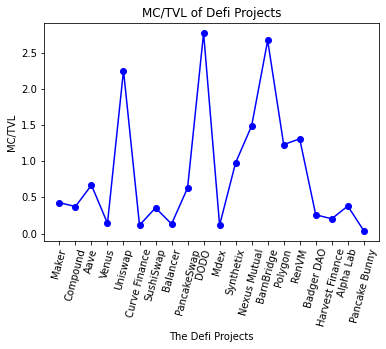

In [36]:
# About the next potential tokens
import matplotlib.pyplot as plt

mc_tvl = data_df["MC/TVL"].to_list()
x=np.arange(0,20)
plt.plot(x, mc_tvl,'bo-')
plt.title('MC/TVL of Defi Projects')
plt.xlabel('The Defi Projects')
plt.ylabel('MC/TVL')
plt.xticks(x, data_df["Name"].tolist(), rotation=75)
plt.show()


In [37]:
# About the top projects:
tvl_df = pd.DataFrame(data_df, columns=["Name", "TVL", "Mkt_Cap"]) # "TVL", "Mkt_Cap"
tvl_df.set_index('Name')
tvl_df.sort_values(by=['Mkt_Cap'], ascending=False)
# TVL top 5: Maker, Compound, Uniswap, PancakeSwap, Aave
# Mkt_Cap top 5: Uniswap, PancakeSwap, Aave, Maker, Compound
# The market has high agreement on top 5 projects. 
# Within these projects, Compound has the lowest Return.
# One potential reason is that it has lowest MC/TVL.


,Name,TVL,Mkt_Cap
4,Uniswap,8.83,19.88
8,PancakeSwap,8.35,5.26
2,Aave,7.41,4.96
0,Maker,9.75,4.16
1,Compound,8.89,3.32
14,Polygon,2.40,2.95
11,Synthetix,1.87,1.83
6,SushiSwap,4.36,1.55
15,RenVM,0.65,0.85
5,Curve Finance,6.57,0.76


In [8]:
# About the categories:
groupby_df = data_df.groupby("Category").mean()
groupby_df.sort_values(by=['Earning_Level'], ascending=False)
# Lending projects have highest earning level (2.25) and TVL (7.71) in average.
# Dexes projects have highest market capital (4.10) in average.


,TVL,Mkt_Cap,MC/TVL,Cir_Supply,Total_Supply,Max_Supply,Cir_Ratio,Price0,Price1,Return,Earning_Level
Category,,,,,,,,,,,
Lending,7.710000,3.280000,0.402900,7.047899e+06,1.424881e+07,1.425139e+07,0.652300,208.362500,1329.137500,8.825000,2.250000
Payments,1.525000,1.900000,1.268450,3.092776e+09,5.500000e+09,5.500000e+09,0.758000,0.175000,0.700000,28.750000,2.000000
Yield,1.997500,0.235000,0.220975,6.495069e+07,2.556186e+08,2.556726e+08,0.542900,21.590000,168.990000,26.720000,2.000000
Dexes,5.095714,4.102857,0.910100,1.992401e+08,6.984019e+08,9.735481e+08,0.399871,3.908571,20.628571,12.521429,1.857143
Derivatives,0.770000,0.840000,1.711033,4.116778e+07,7.739429e+07,7.644938e+07,0.561000,19.940000,49.963333,2.390000,1.000000


In [11]:
# About the correlation
def corr_coef(A, B):
    # Compute the correlation between dataframe column A (str) and column B (str)
    return data_df[A].corr(data_df[B])

corr_name = [("Cir_Ratio", "Price1"), ("TVL", "Mkt_Cap"), ("Cir_Ratio", "Return")]
for pair in corr_name:
    print("The correlation between {0} and {1}: {2}.".format(pair[0], pair[1], corr_coef(pair[0], pair[1])))


The correlation between Cir_Ratio and Price1: 0.38575768460844334.
The correlation between TVL and Mkt_Cap: 0.5725069031897233.
The correlation between Cir_Ratio and Return: 0.10382092591700631.
